Actividad 1: Proycto Python

1) Eleccion DataSet: Es es un DataSet tomado de Kaggle que se enfoca en la Lista de videoJuegos con ventas al rededor de todo el mundo y se utilizans varibles como la plataforma, el anio, el Genero, Ventas en diferentes lugares y el total de Ventas:

Name - Nombre del Juego

Platform - Plataforma del Juego

Year - Anio de Lanzamiento

Genre - Genero del Juego 

Publisher - Empresa Responsable de su publicacion.

NA_Sales - Ventas en Norte America (Millones)

EU_Sales - Ventas en Europa (Millones)

JP_Sales - Ventas en Japon (Millones)

Other_Sales - Venta en el resto del mundo (Millones)

Global_Sales - Ventas totales

Seleccione este DataSet porque es un tema que me llama la atencion y que me gusta, por lo que veo interesante poder aplicar todos los puntos desarrollados y puntos compartidos en las sesiones y documentacion.

In [29]:
#Importacion de bibliotecas o librerias que nos ayudaran al analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [11]:
#Se lee el dataset y se guarda en un DataFrame
dfArchivoKeaggle = pd.read_csv('vgsales.csv')

2) Analisis Exploratorio del DataSet:

In [12]:
#Se hace un conteo del DataFrame, tanto de Registros(16598) como de Columnas(11) 
dfArchivoKeaggle.shape

(16598, 11)

In [15]:
#Se consultan los primeros 5 registros del DataFrame (Archivo descargado)
dfArchivoKeaggle.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
#Se consultan los ultimos 5 registros del DataFrame (Archivo descargado)
dfArchivoKeaggle.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [18]:
#Detalles del DataFrame
dfArchivoKeaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [30]:
#Se muestran los tipos de datos de las columnas del DataFrame
dfArchivoKeaggle.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [20]:
#Resumen estadístico de las columnas del DataFrame 
dfArchivoKeaggle.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


3) Limpieza y Transformacion de los Datos:

In [22]:
#Se declaran una Variable que muestra los valores nulos por columnas y se muestran 
ValoresNulos = dfArchivoKeaggle.isnull().sum()
print(ValoresNulos)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [23]:
#Se eliminan los registros nullos porque el analis que se piensa aplicar tiene que ver con el anio
dfArchivoKeaggle = dfArchivoKeaggle.dropna()

In [33]:
#Se hace conteo de los registros que quedaron despues de eliminar los nulos
dfArchivoKeaggle.shape

(16291, 11)

In [24]:
#Se confirma valores nulos eliminados, 
ValoresNulos = dfArchivoKeaggle.isnull().sum()
print(ValoresNulos)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [25]:
#Se verifican los valores unicos esto solo para tener un dato estadistico 
dfArchivoKeaggle.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [40]:
#Se hace conteo de cantidad de registros por plataforma
dfArchivoKeaggle['Platform'].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

4) Visualizacion del Resultado

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'DS'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PSP'),
  Text(6, 0, 'PS'),
  Text(7, 0, 'PC'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'GBA'),
  Text(10, 0, 'GC'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'PSV'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'SAT'),
  Text(18, 0, 'WiiU'),
  Text(19, 0, '2600'),
  Text(20, 0, 'NES'),
  Text(21, 0, 'GB'),
  Text(22, 0, 'DC'),
  Text(23, 0, 'GEN'),
  Text(24, 0, 'NG'),
  Text(25, 0, 'SCD'),
  Text(26, 0, 'WS'),
  Text(27, 0, '3DO'),
  Text(28, 0, 'TG16'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

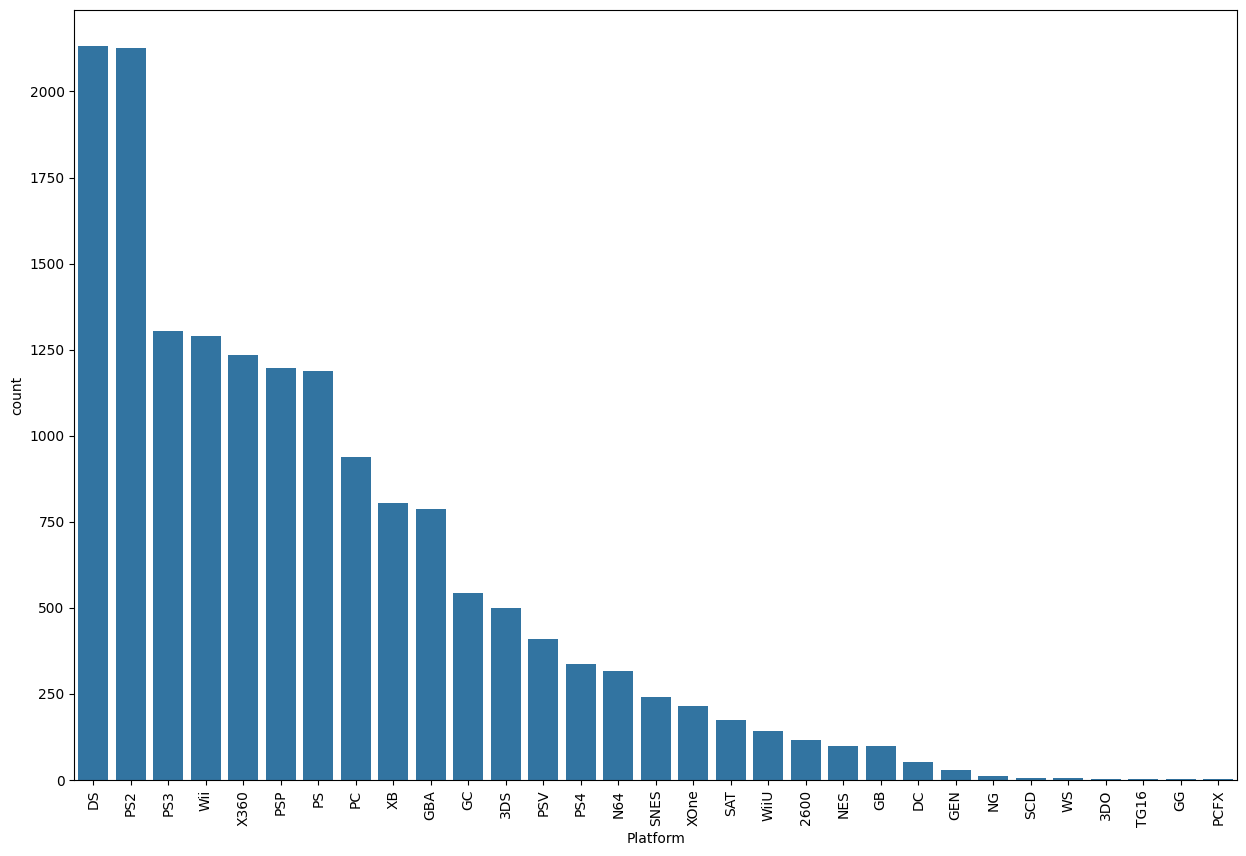

In [42]:
#Se presenta Cantidad de Registros por plataforma en grafico de barras
#Esto puede ayudar a determinar las tendencias de una plataforma
plt.figure(figsize=(15, 10))
sns.countplot(x="Platform", data=dfArchivoKeaggle, order = dfArchivoKeaggle['Platform'].value_counts().index)
plt.xticks(rotation=90)

In [44]:
#Se hace conteo de cantidad de registros por plataforma
dfArchivoKeaggle['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

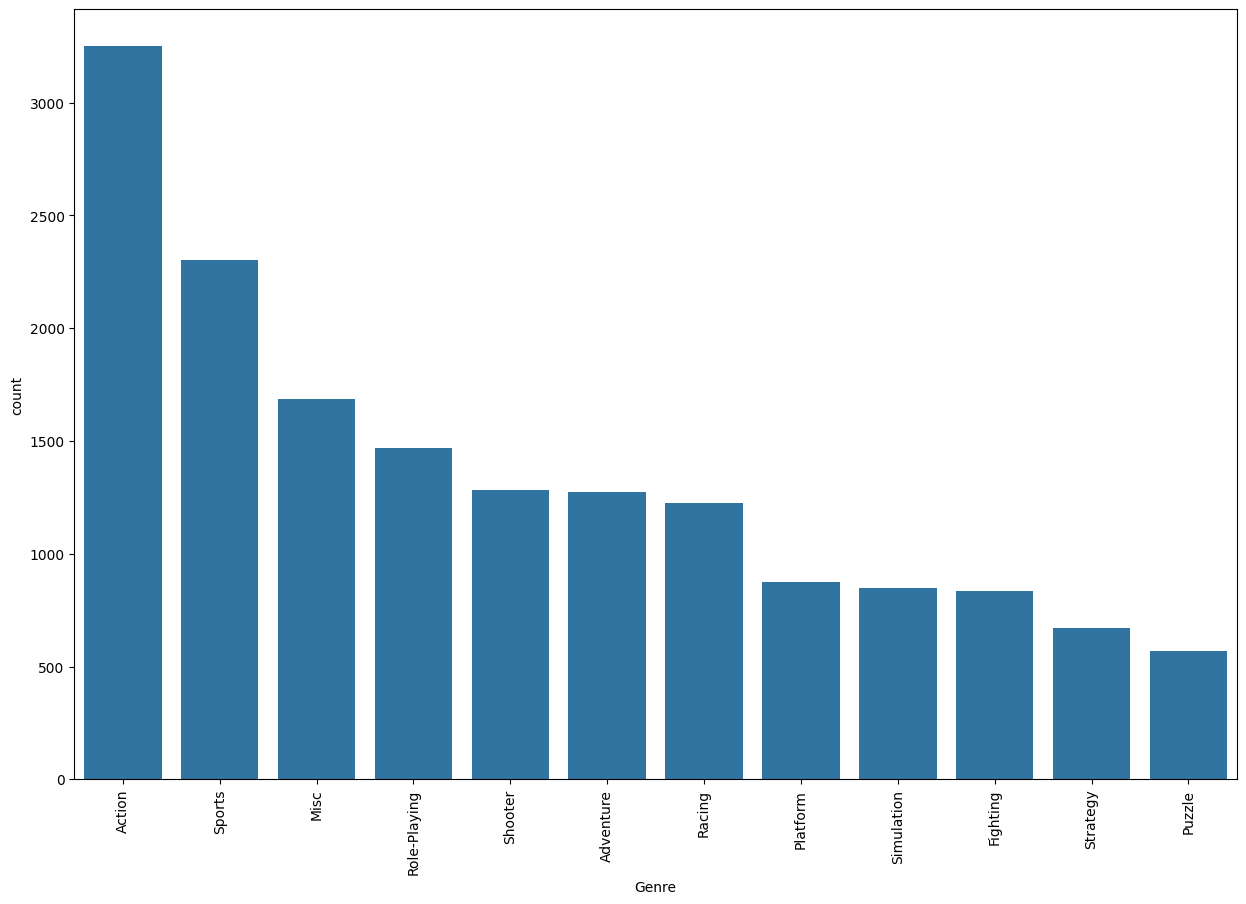

In [45]:
#Se presenta Cantidad de Registros por Genero en grafico de barras
#Esto puede ayudar a determinar las tendencias de un Genero y enfocarse en publicar mas de ese tipo 
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=dfArchivoKeaggle, order = dfArchivoKeaggle['Genre'].value_counts().index)
plt.xticks(rotation=90)

In [70]:
#Se Genera un DataFrame Agrupado por Plataforma y que calcula la suma de Ventas globales (por plataforma)
Platform = dfArchivoKeaggle.groupby("Platform")
Platform["Global_Sales"].sum()

Platform
2600      86.57
3DO        0.10
3DS      246.27
DC        15.97
DS       818.91
GB       254.42
GBA      305.62
GC       197.14
GEN       28.36
GG         0.04
N64      218.21
NES      251.07
NG         1.44
PC       254.70
PCFX       0.03
PS       727.39
PS2     1233.46
PS3      949.35
PS4      278.10
PSP      291.71
PSV       61.60
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      909.81
WiiU      81.86
X360     969.60
XB       252.09
XOne     141.06
Name: Global_Sales, dtype: float64

In [71]:
#Se calcula la media de las ventas globales por plataforma
Platform_avg=dfArchivoKeaggle["Global_Sales"].groupby(dfArchivoKeaggle["Platform"]).mean()
Platform_avg

Platform
2600    0.746293
3DO     0.033333
3DS     0.493527
DC      0.307115
DS      0.384284
GB      2.622887
GBA     0.388830
GC      0.363727
GEN     1.050370
GG      0.040000
N64     0.690538
NES     2.561939
NG      0.120000
PC      0.271535
PCFX    0.030000
PS      0.611766
PS2     0.579906
PS3     0.728029
PS4     0.827679
PSP     0.243701
PSV     0.150244
SAT     0.194162
SCD     0.311667
SNES    0.837029
TG16    0.080000
WS      0.236667
Wii     0.705279
WiiU    0.572448
X360    0.785737
XB      0.313935
XOne    0.662254
Name: Global_Sales, dtype: float64

<Axes: ylabel='Global_Sales'>

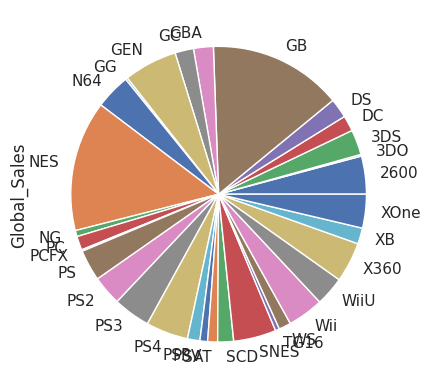

In [72]:
#Grafico de pastel que representa el promedio de ventas globales por plataforma
Platform_avg.plot.pie()

In [73]:
##Se Genera un DataFrame Agrupado por genero y que calcula l suma de Ventas globales (por genero)
Genre = dfArchivoKeaggle.groupby("Genre")
Genre["Global_Sales"].sum()

Genre
Action          1722.84
Adventure        234.59
Fighting         444.05
Misc             789.87
Platform         829.13
Puzzle           242.21
Racing           726.76
Role-Playing     923.83
Shooter         1026.20
Simulation       389.98
Sports          1309.24
Strategy         173.27
Name: Global_Sales, dtype: float64

In [74]:
#Se calcula la media de las ventas globales por genero
dfGenre=dfArchivoKeaggle["Global_Sales"].groupby(dfArchivoKeaggle["Genre"]).mean()
dfGenre

Genre
Action          0.529942
Adventure       0.184137
Fighting        0.531160
Misc            0.468488
Platform        0.947577
Puzzle          0.424930
Racing          0.593273
Role-Playing    0.628456
Shooter         0.800468
Simulation      0.459882
Sports          0.568247
Strategy        0.258612
Name: Global_Sales, dtype: float64

<Axes: ylabel='Global_Sales'>

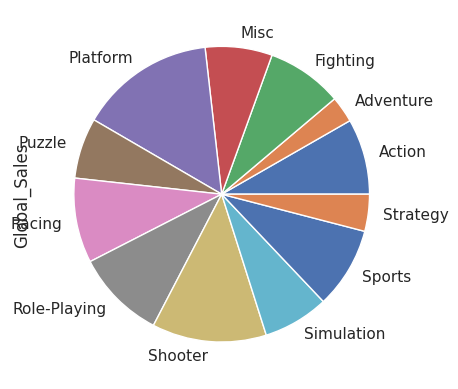

In [75]:
#Grafico de pastel que representa el promedio de ventas globales por genero
dfGenre.plot.pie()

5) Documentacion y Presentacion

Se realiza un analisis del Dataset enfocandonos en dos Variables Plataforma y Genero para poder determinar en el periodo de tiempo que tiene el DataSet, que plataforma y categorias han sido compartidos, este analisis busca presentar la informacion para poder determinar estrategias tanto para los publisher como las personas de Marketing suponiendo que este anailisis se genera mes a mes, se podria buscar perfilar el comportamiento tanto de las plataformas como el genero, un ejemplo podria ser que yo veo que la plataforma de ps2  o DS en el genero.

Hallazgos encontrados en el momento que se genero este DataSet la plataforma de PS2 y del Genero accion son las mas colocadas, pero al ver los promedios de ventas de plataformas y generos podriamos encontrar que el Genero Shooter es el que tiene un promedio de Ventas mayor y que las plataformas de GB y Nes tienen un promedio mas elevado de Ventas, tambien se podria hacer el analisis de forma inversa y ver los peores promedios.

La conclusion es que con esta informacion que se pudiera generar mes a mes (para poder comparar en el tiempo) y determinar prioridades de colocacion y desarrollo de juegos dependiendo del Genero y de la plataforma esta informacion puede ser util para las empresas que desarrollan Juegos.